# Fitting a straight line

In [1]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import triangle

import nestle

In [2]:
def model(theta, x):
    m, c = theta
    return m*x + c

Generate some data...

<Container object of 3 artists>

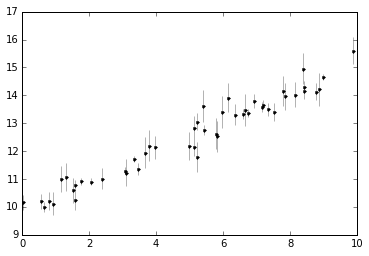

In [3]:
theta_true = [0.5, 10.0]
N = 50
x = np.sort(10*np.random.rand(N))
y = model(theta_true, x) 
yerr = 0.1+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)
plt.errorbar(x, y, yerr=yerr, capsize=0, fmt='k.', ecolor='.7')

The likelihood function:

In [4]:
def lnlike(theta):
    return -0.5*(np.sum((y-model(theta, x))**2/yerr**2))

Flat prior in $[0 < m < 1]$, $[0 < b < 100]$:

In [5]:
def prior(theta):
    return np.array([1., 100.]) * theta

Run nested sampling:

In [11]:
res = nestle.sample(lnlike, prior, 2, method='multi', npoints=1000, maxiter=100000)

Print some results:

In [12]:
print("logz = {0:6.3f} +/- {1:6.3f}".format(res.logz, res.logzerr))
print("iterations: {0:d}".format(res.niter))
print("number of likelihood calls: {0:d}".format(res.ncall))
print(res.keys())

logz = -28.557 +/-  0.098
iterations: 15038
number of likelihood calls: 24585
dict_keys(['logz', 'samples', 'logl', 'ncall', 'h', 'logzerr', 'weights', 'logprior', 'niter'])


Plot result distribution:

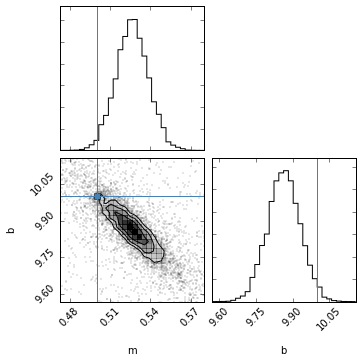

In [13]:
fig = triangle.corner(res.samples, weights=res.weights, labels=['m', 'b'],
                      extents=[0.99999, 0.99999], truths=theta_true, bins=30)

Estimate of mean and covariance:

In [9]:
# weighted average and covariance:
p, cov = nestle.weightedcov(res.samples, res.weights)

print("m = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("b = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))
print(cov)

m =  0.53 +/-  0.01
b =  9.86 +/-  0.07
[[ 0.00015214 -0.00071986]
 [-0.00071986  0.00456342]]


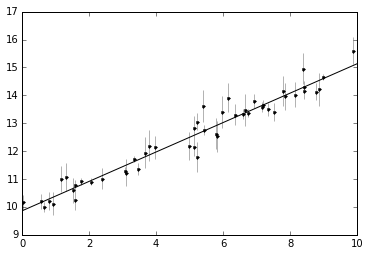

In [14]:
plt.errorbar(x, y, yerr=yerr, capsize=0, fmt='k.', ecolor='.7')
plt.plot([0., 10.], model(p, np.array([0., 10.])), c='k')